In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Simulation of Straight-Ticket Voter Dynamics

<AxesSubplot:xlabel='straight', ylabel='diff_from_total'>

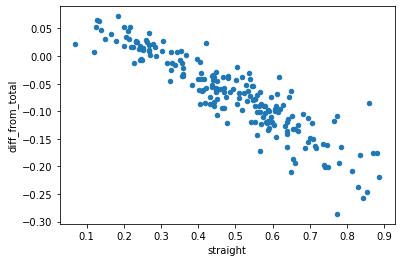

In [4]:
# Parameters
precincts = 200
straight_trump_probs = np.random.beta(3, 3, precincts)

biden_to_trump_prob = .2
trump_to_biden_prob = .5

straight_pcts = []
total_pcts = []
diffs = []

for prob in straight_trump_probs:
    votes_per_precinct = int(np.random.beta(1, 1, 1)[0]) * 2700 + 300 # precints need to be between 300 and 2999 voters
    straight_ballot_pct = np.random.beta(10, 10, 1)[0]
    straight_ballot_count = int(straight_ballot_pct * votes_per_precinct)
    mixed_ballot_count = votes_per_precinct - straight_ballot_count 
    straight_ballots = np.random.binomial(1, prob, straight_ballot_count) 
    expected_mixed_ballots = np.random.binomial(1, prob, mixed_ballot_count)
    expected_mixed_trump = expected_mixed_ballots.sum()
    expected_mixed_biden = votes_per_precinct - straight_ballot_count - expected_mixed_trump 
    n_switching_to_biden = np.random.binomial(1, trump_to_biden_prob, expected_mixed_trump).sum() 
    n_switching_to_trump = np.random.binomial(1, biden_to_trump_prob, expected_mixed_biden).sum()
    trump_mixed_vote = expected_mixed_trump + n_switching_to_trump - n_switching_to_biden
    total_vote_pct = (trump_mixed_vote + straight_ballots.sum()) / votes_per_precinct
    straight_ballot_actual_pct = straight_ballots.sum() / straight_ballot_count
    diff = total_vote_pct - straight_ballot_actual_pct
    straight_pcts += [straight_ballot_actual_pct]
    total_pcts += [total_vote_pct]
    diffs += [diff]

pd.DataFrame(zip(straight_pcts, diffs), columns=['straight', 'diff_from_total']).plot(x='straight', y='diff_from_total', kind='scatter')

maccomb
- https://clerk.macombgov.org/sites/default/files/content/government/clerk/electionresults/2016/November16/results.html

kent, 

oakland 
- all: https://results.enr.clarityelections.com/MI/Oakland/63990/184040/en/summary.html
- stright party: https://results.enr.clarityelections.com/MI/Oakland/63990/184040/en/md_data.html?cid=0105&
- mixed: https://results.enr.clarityelections.com/MI/Oakland/63990/184040/en/md_data.html?cid=0106&

<AxesSubplot:xlabel='Rep_straight_pct', ylabel='Rep_total-straight_pct_diff'>

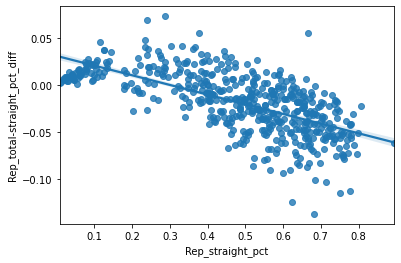

In [5]:
oakland = pd.read_csv('data/Oakland County 2016.csv')
oakland = oakland[oakland["Precinct"] != "Precinct"]  # remove duplicated title rows
precinct = oakland['Precinct']
oakland = oakland.apply(pd.to_numeric, errors='coerce')  # convert to floats
oakland['Precinct'] = precinct

oak_straight = oakland[oakland['Straight Party'] == 1]
oak_mixed = oakland[oakland['Straight Party'] == 0]
oak_all = pd.merge(oak_mixed, oak_straight, on="Precinct", suffixes=("_mixed", "_straight"))

oak_all['total_Dem_Rep_votes'] = (
    oak_all['Republican Party_mixed'] + 
    oak_all['Republican Party_straight'] + 
    oak_all['Democratic Party_mixed'] + 
    oak_all['Democratic Party_straight'] 
)

oak_all['total_Dem_Rep_straight_votes'] = (
    oak_all['Republican Party_straight'] + 
    oak_all['Democratic Party_straight'] 
)

oak_all['total_Rep_votes'] = (
    oak_all['Republican Party_mixed'] + 
    oak_all['Republican Party_straight']
)

oak_all['total_Dem_votes'] = (
    oak_all['Democratic Party_mixed'] + 
    oak_all['Democratic Party_straight'] 
)

oak_all["Rep_straight_pct"] = oak_all['Republican Party_straight'] / oak_all['total_Dem_Rep_straight_votes']
oak_all["Rep_total_pct"] = oak_all['total_Rep_votes'] / oak_all['total_Dem_Rep_votes']
oak_all['Rep_total-straight_pct_diff'] = oak_all['Rep_total_pct'] - oak_all['Rep_straight_pct']

sns.regplot(x="Rep_straight_pct", y="Rep_total-straight_pct_diff", data=oak_all)

2016-General-Winston.xls
Intercept           0.003341
Rep_straight_pct    0.003174
dtype: float64


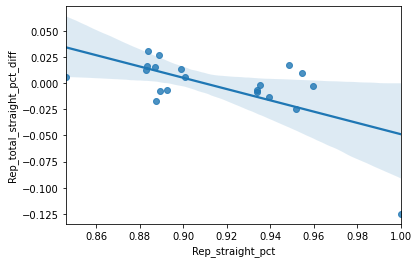

2016-General-Elmore.xls
Intercept           0.000001
Rep_straight_pct    0.000679
dtype: float64


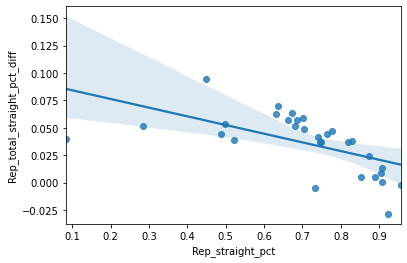

2016-General-Etowah.xls
Intercept           0.000003
Rep_straight_pct    0.002789
dtype: float64


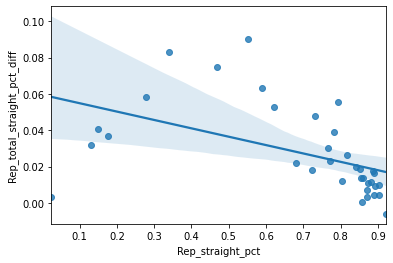

2016-General-Shelby.xls
Intercept           1.972727e-06
Rep_straight_pct    2.905999e-07
dtype: float64


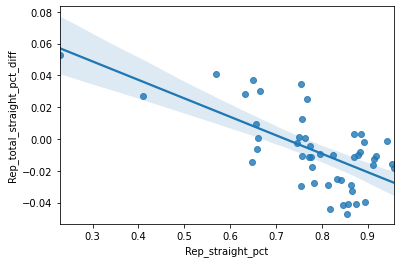

2016-General-Bullock.xls
Intercept           0.000833
Rep_straight_pct    0.001771
dtype: float64


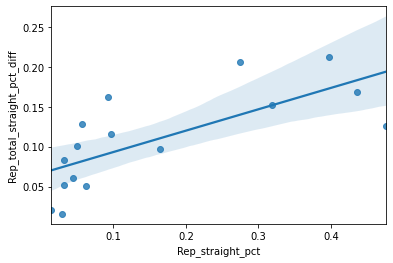

2016-General-Pike.xls
Intercept           0.000007
Rep_straight_pct    0.290101
dtype: float64


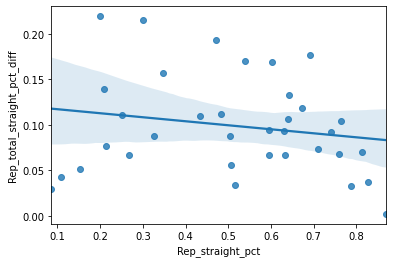

2016-General-Mobile.xls
Intercept           2.764819e-16
Rep_straight_pct    2.602414e-05
dtype: float64


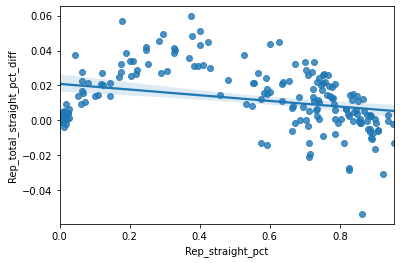

2016-General-Colbert.xls
Intercept           1.743750e-08
Rep_straight_pct    1.624243e-02
dtype: float64


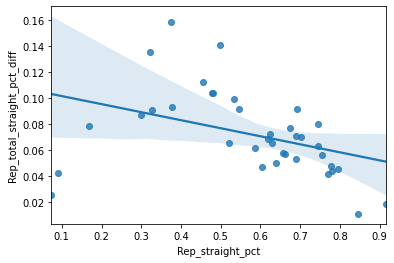

2016-General-Lauderdale.xls
Intercept           0.000085
Rep_straight_pct    0.045890
dtype: float64


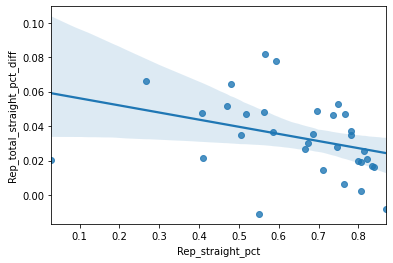

2016-General-Chilton.xls
Intercept           0.032292
Rep_straight_pct    0.059017
dtype: float64


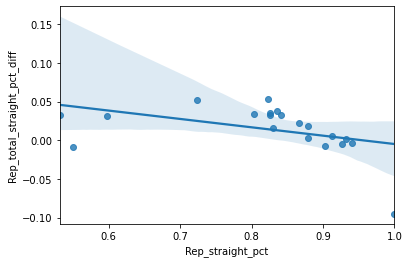

2016-General-Conecuh.xls
Intercept           0.000036
Rep_straight_pct    0.812079
dtype: float64


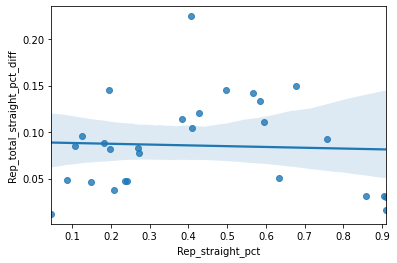

2016-General-Coosa.xls
Intercept           0.001367
Rep_straight_pct    0.020447
dtype: float64


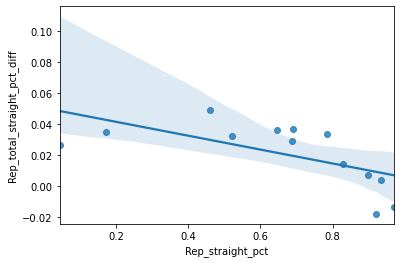

2016-General-Perry.xls
Intercept           0.011963
Rep_straight_pct    0.233095
dtype: float64


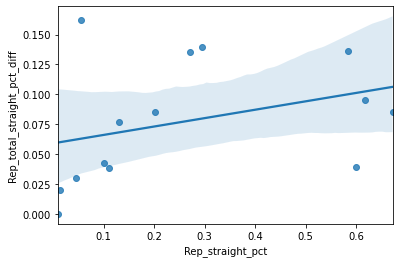

2016-General-Choctaw.xls
Intercept           0.000029
Rep_straight_pct    0.527629
dtype: float64


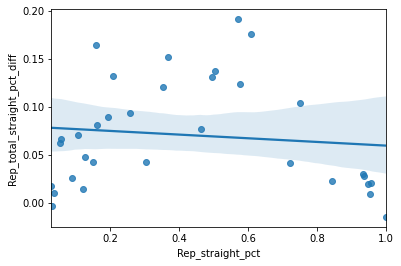

2016-General-Clay.xls
Intercept           0.000001
Rep_straight_pct    0.000003
dtype: float64


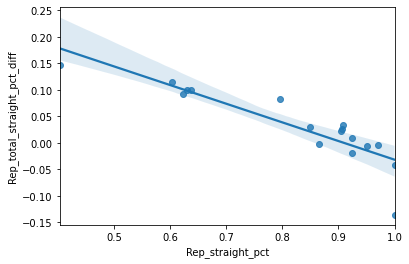

2016-General-Escambia.xls
Intercept           0.000002
Rep_straight_pct    0.000468
dtype: float64


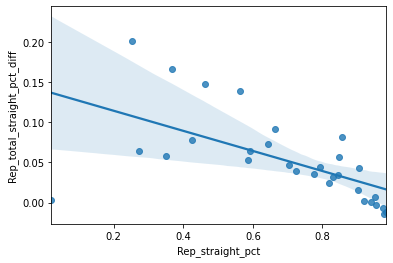

2016-General-Jefferson.xlsx
Intercept           6.229540e-04
Rep_straight_pct    1.339557e-09
dtype: float64


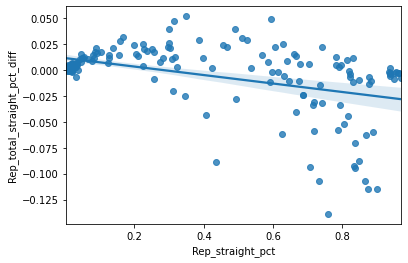

2016-General-Madison.xls
Intercept           0.000047
Rep_straight_pct    0.001644
dtype: float64


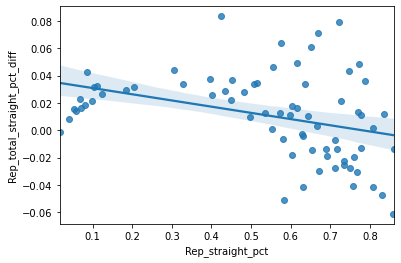

2016-General-Macon.xls
Intercept           0.209129
Rep_straight_pct    0.000072
dtype: float64


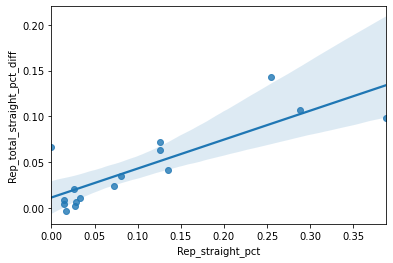

2016-General-Washington.xls
Intercept           0.000041
Rep_straight_pct    0.017848
dtype: float64


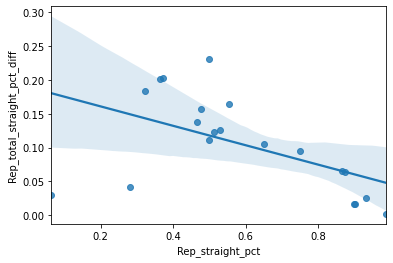

2016-General-Covington.xls
Intercept           1.750251e-12
Rep_straight_pct    1.412673e-11
dtype: float64


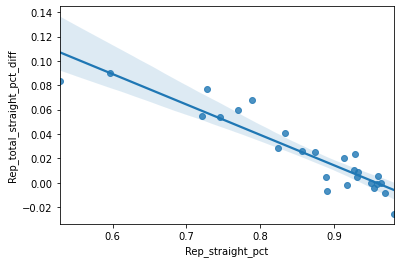

2016-General-StClair.xls
Intercept           0.000002
Rep_straight_pct    0.000005
dtype: float64


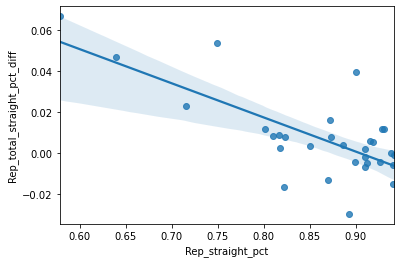

2016-General-Randolph.xls
Intercept           1.255100e-12
Rep_straight_pct    1.595354e-10
dtype: float64


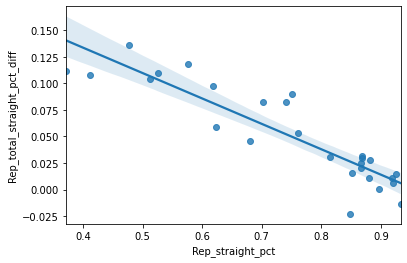

2016-General-Chambers.xls
Intercept           1.514760e-07
Rep_straight_pct    3.171907e-03
dtype: float64


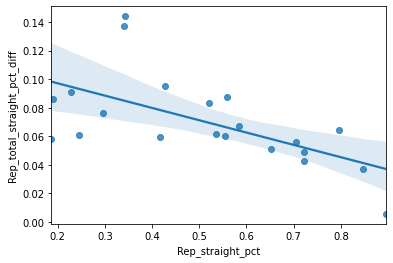

2016-General-Dallas.xls
Intercept           0.003469
Rep_straight_pct    0.000132
dtype: float64


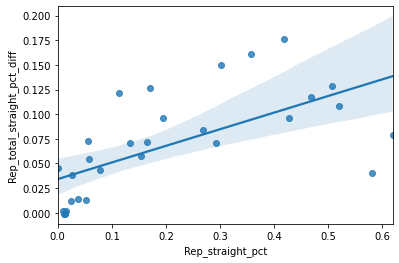

2016-General-Fayette.xls
Intercept           9.904931e-07
Rep_straight_pct    5.202506e-06
dtype: float64


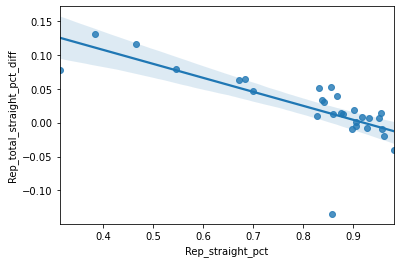

2016-General-Clarke.xls
Intercept           9.052374e-08
Rep_straight_pct    7.500973e-02
dtype: float64


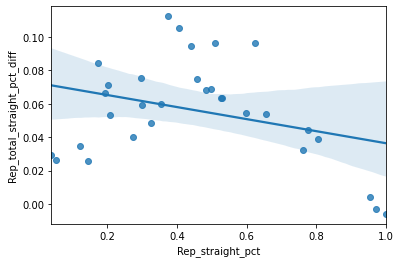

2016-General-Tallapoosa.xls
Intercept           0.000003
Rep_straight_pct    0.002870
dtype: float64


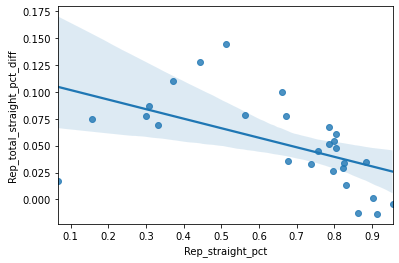

2016-General-Limestone.xls
Intercept           2.242743e-10
Rep_straight_pct    1.748699e-08
dtype: float64


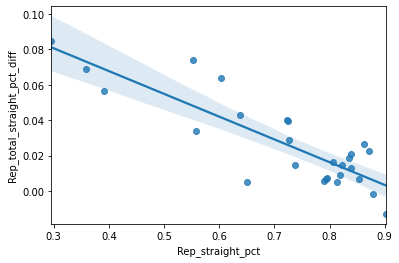

2016-General-Barbour.xls
Intercept           0.000252
Rep_straight_pct    0.748871
dtype: float64


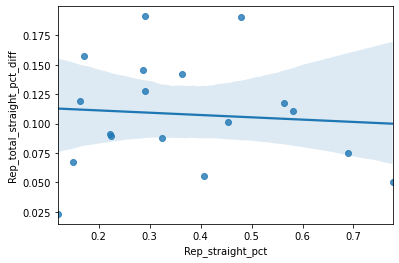

2016-General-Geneva.xls
Intercept           4.023926e-19
Rep_straight_pct    1.629844e-17
dtype: float64


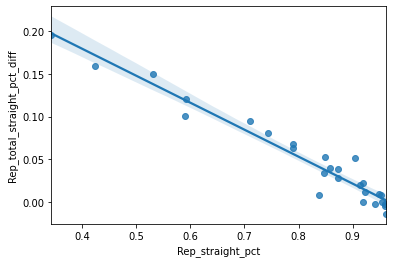

2016-General-Baldwin.xls
Intercept           0.000005
Rep_straight_pct    0.000006
dtype: float64


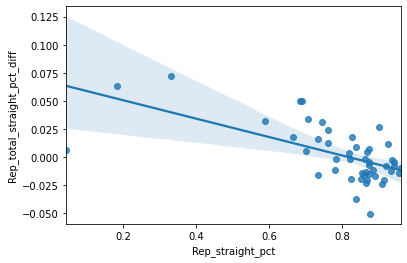

2016-General-Lee.xls
Intercept           0.000672
Rep_straight_pct    0.035632
dtype: float64


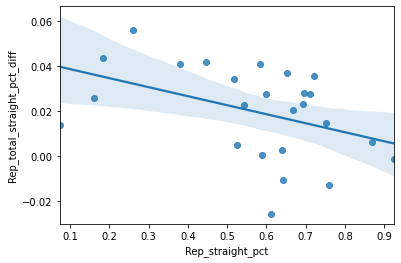

2016-General-Russell.xls
Intercept           0.000936
Rep_straight_pct    0.497033
dtype: float64


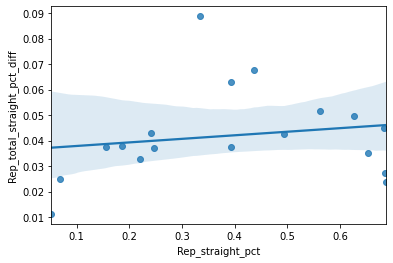

2016-General-Cherokee.xls
Intercept           7.221896e-10
Rep_straight_pct    3.367746e-09
dtype: float64


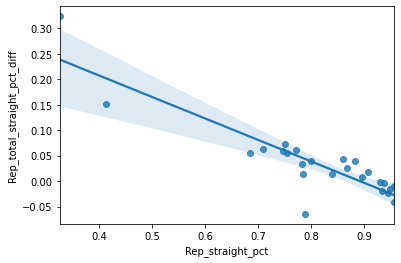

2016-General-Morgan.xls
Intercept           0.000042
Rep_straight_pct    0.000706
dtype: float64


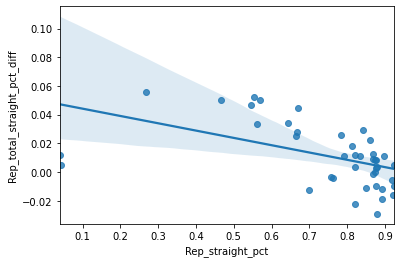

2016-General-Crenshaw.xls
Intercept           0.000024
Rep_straight_pct    0.005459
dtype: float64


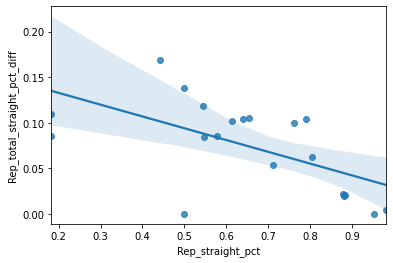

2016-General-Cleburne.xls
Intercept           0.171630
Rep_straight_pct    0.151385
dtype: float64


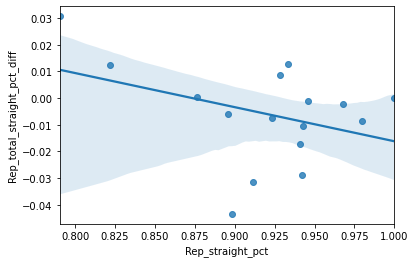

2016-General-Henry.xls
Intercept           2.635198e-07
Rep_straight_pct    5.314568e-04
dtype: float64


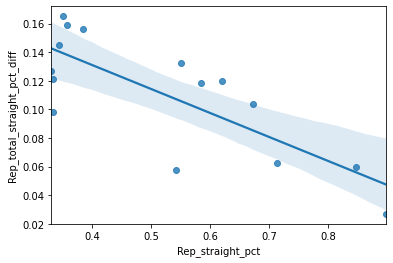

2016-General-Wilcox.xls
Intercept           0.016744
Rep_straight_pct    0.000029
dtype: float64


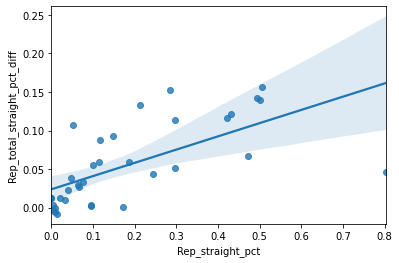

2016-General-Pickens.xls
Intercept           0.000015
Rep_straight_pct    0.026958
dtype: float64


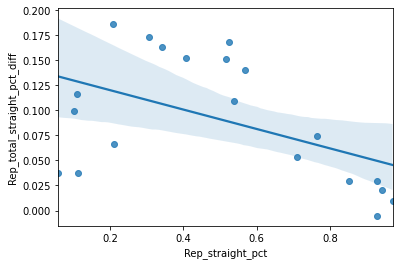

2016-General-Butler.xls
Intercept           1.133872e-08
Rep_straight_pct    1.662615e-03
dtype: float64


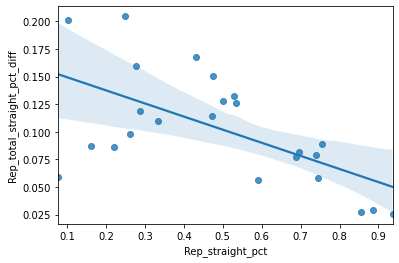

2016-General-Autauga.xls
Intercept           7.560350e-09
Rep_straight_pct    1.491109e-06
dtype: float64


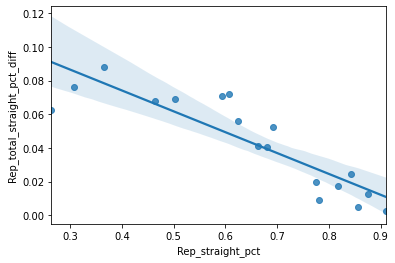

2016-General-Houston.xls
Intercept           1.336371e-07
Rep_straight_pct    3.078040e-03
dtype: float64


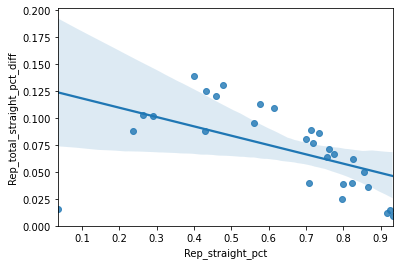

2016-General-Tuscaloosa.xls
Intercept           0.000011
Rep_straight_pct    0.000445
dtype: float64


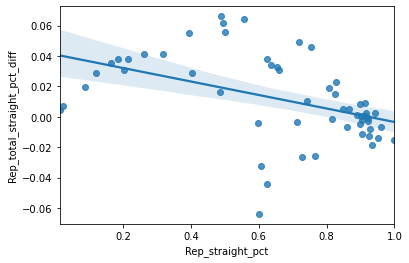

2016-General-Blount.xls
Intercept           0.000048
Rep_straight_pct    0.000056
dtype: float64


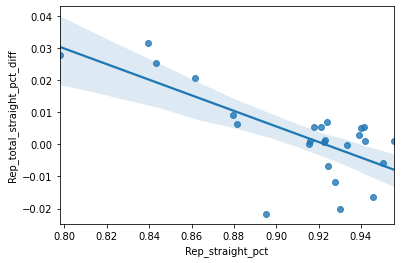

2016-General-Coffee.xls
Intercept           8.733262e-08
Rep_straight_pct    5.208517e-06
dtype: float64


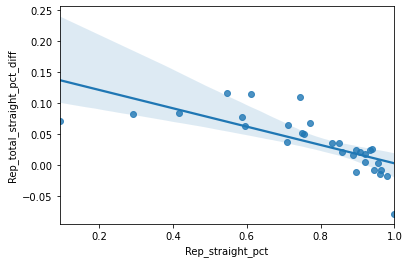

2016-General-Hale.xls
Intercept           0.000123
Rep_straight_pct    0.954842
dtype: float64


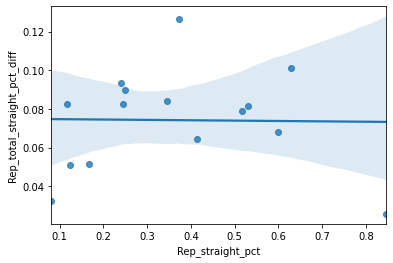

2016-General-Cullman.xls
Intercept           3.478987e-07
Rep_straight_pct    2.185817e-06
dtype: float64


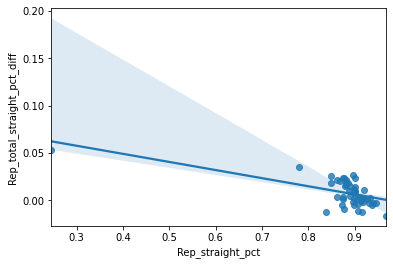

2016-General-Dale.xls
Intercept           0.000011
Rep_straight_pct    0.000764
dtype: float64


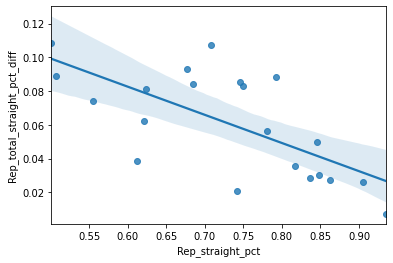

2016-General-Sumter.xls
Intercept           0.061835
Rep_straight_pct    0.000686
dtype: float64


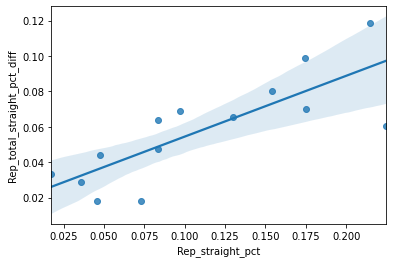

2016-General-Lowndes.xls
Intercept           0.060990
Rep_straight_pct    0.115326
dtype: float64


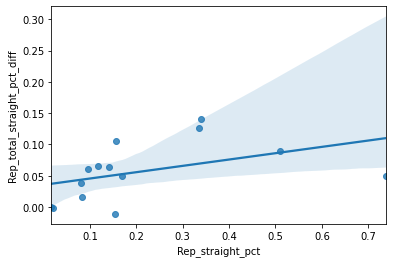

2016-General-Lawrence.xls
Intercept           0.000012
Rep_straight_pct    0.005051
dtype: float64


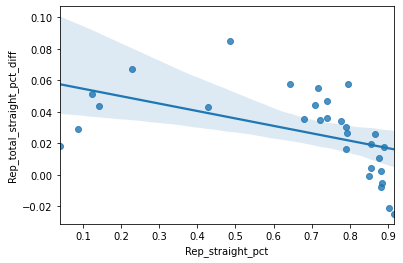

2016-General-Bibb.xls
Intercept           0.003763
Rep_straight_pct    0.029875
dtype: float64


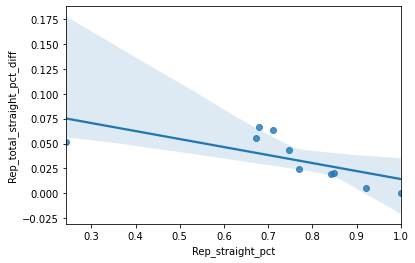

2016-General-Calhoun.xls
Intercept           0.000011
Rep_straight_pct    0.012808
dtype: float64


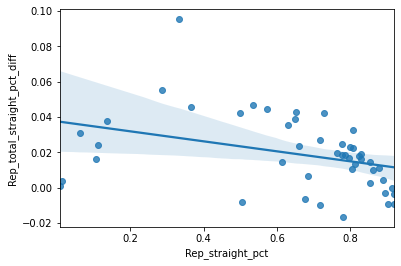

2016-General-Greene.xls
Intercept           0.028034
Rep_straight_pct    0.004492
dtype: float64


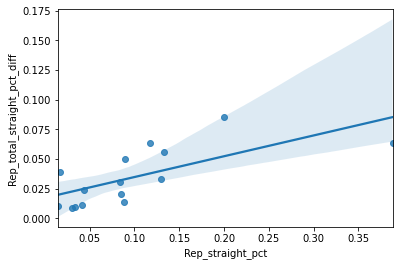

2016-General-Marengo.xls
Intercept           0.000976
Rep_straight_pct    0.691528
dtype: float64


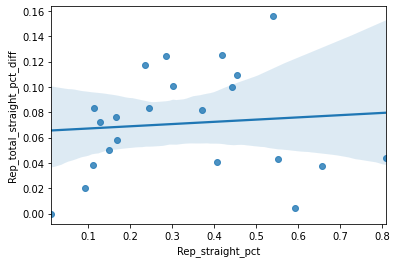

2016-General-Marion.xls
Intercept           0.000038
Rep_straight_pct    0.000106
dtype: float64


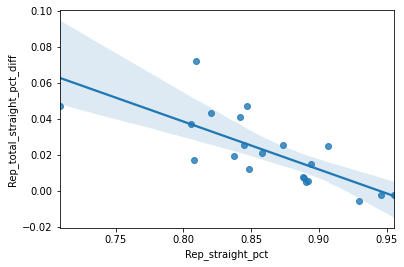

2016-General-Franklin.xls
Intercept           0.000003
Rep_straight_pct    0.001091
dtype: float64


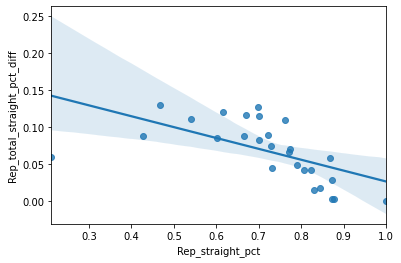

2016-General-Lamar.xls
Intercept           0.000004
Rep_straight_pct    0.000016
dtype: float64


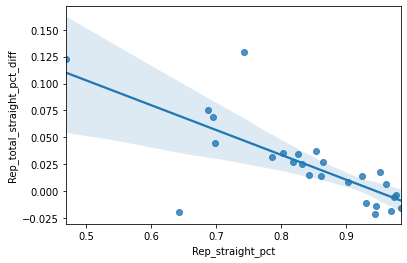

In [ ]:
# https://www.sos.alabama.gov/alabama-votes/voter/election-data

path = "data/2016-General-PrecinctLevel/" 
counties = os.listdir("data/2016-General-PrecinctLevel/")

params = pd.DataFrame(columns=["Intercept", "Rep_straight_pct", "p_intercept", "p_Rep_straight_pct"]).T

for county in counties:
    print(county)
    county_data = pd.read_excel(path + county)
    county_data_clean = county_data.iloc[:, 2:]
    county_data_clean['Candidate'] = county_data_clean['Candidate'].apply(lambda x: x.strip())
    county_data_clean = county_data_clean.set_index('Candidate').T

    county_data_clean['total_Dem_Rep_straight_votes'] = (
        county_data_clean['Alabama Democratic Party'] + 
        county_data_clean['Alabama Republican Party']
    )
    county_data_clean['total_Dem_Rep_votes'] = (
        county_data_clean['Alabama Democratic Party'] + 
        county_data_clean['Alabama Republican Party'] +
        county_data_clean['Hillary Rodham Clinton'] +
        county_data_clean['Donald J. Trump']
    )
    county_data_clean['total_Rep_votes'] = county_data_clean['Alabama Republican Party'] + county_data_clean['Donald J. Trump']
    county_data_clean["Rep_straight_pct"] = county_data_clean['Alabama Republican Party'] / county_data_clean['total_Dem_Rep_straight_votes']
    county_data_clean["Rep_total_pct"] = county_data_clean['total_Rep_votes'] / county_data_clean['total_Dem_Rep_votes']
    county_data_clean['Rep_total_straight_pct_diff'] = county_data_clean['Rep_total_pct'] - county_data_clean['Rep_straight_pct']

    model = smf.ols("Rep_total_straight_pct_diff ~ Rep_straight_pct", county_data_clean).fit()
    params[county] = pd.concat([
        model.params,
        pd.DataFrame(model.pvalues).T.rename(columns={"Intercept": "p_intercept", "Rep_straight_pct": "p_Rep_straight_pct"}).T[0]
    ])
    print(model.pvalues)
    sns.regplot(x="Rep_straight_pct", y="Rep_total_straight_pct_diff", data=county_data_clean)
    plt.show()
params = params.T

## How many counties show no significant trend?

In [ ]:
params[(params["Rep_straight_pct"] < 0) & (params["p_Rep_straight_pct"] < 0.05)]

## How many counties show no significant trend?

In [ ]:
len(params[params["p_Rep_straight_pct"] >= 0.05]) 
# len(params)

In [ ]:
params["Rep_straight_pct"].hist()
# params["p_Rep_straight_pct"].hist()

In [ ]:
params["p_Rep_straight_pct"].hist(bins=20)